# Predicting Interest rate of the loan  and visualization

## 1. Data Understanding
##### The data set represents thousands of loans made through the Lending Club platform, Not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications!

In [1]:
#Understanding the dataset

In [2]:
#import libraries
import pandas as pd

In [3]:
#reading the dataset
data = pd.read_csv('C:/Users/anura/Downloads/loans_full_schema.csv')

In [4]:
#showing the features of the dataset and target is the interest_rate
data.head().T

,0,1,2,3,4
emp_title,global config engineer,warehouse office clerk,assembly,customer service,security supervisor
emp_length,3,10,3,1,10
state,NJ,HI,WI,PA,CA
homeownership,MORTGAGE,RENT,RENT,RENT,RENT
annual_income,90000,40000,40000,30000,35000
verified_income,Verified,Not Verified,Source Verified,Not Verified,Verified
debt_to_income,18.01,5.04,21.15,10.16,57.96
annual_income_joint,NaN,NaN,NaN,NaN,57000
verification_income_joint,NaN,NaN,NaN,NaN,Verified
debt_to_income_joint,NaN,NaN,NaN,NaN,37.66


## 2.Data preparation 

##### Checking missing values and EDA

In [5]:
#summary of the data set
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [6]:
#Checking for null values in the dataset
data.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

##### The features such as annual_income_joint,verification_income_joint,debt_to_income_joint  ,months_since_90d_late,months_since_last_delinq have more then 50% of the data are missing value.Hence , we will not take into consideration while making our model.

#### emp_title is not very useful depending on different organization and their objective.

In [7]:
data.drop(['annual_income_joint', 'verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late','emp_title'], axis=1,inplace=True)

In [8]:
#Checking if it is drop
len(data.columns)

49

In [9]:
#Checking for missing values
data.isna().sum()

emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limi

In [10]:
#checking homeownership
data.homeownership.value_counts()

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

In [11]:
#Checking verified_income
data.verified_income.unique() 

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [12]:
#checking loan purpose
data.loan_purpose.unique()

array(['moving', 'debt_consolidation', 'other', 'credit_card',
       'home_improvement', 'medical', 'house', 'small_business', 'car',
       'major_purchase', 'vacation', 'renewable_energy'], dtype=object)

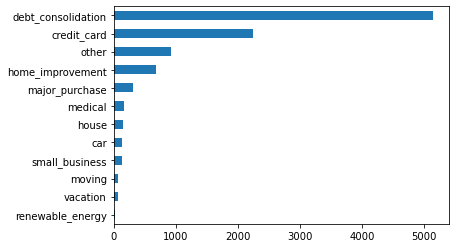

In [13]:
#thinking of binning if values are very small
data.loan_purpose.value_counts().sort_values().plot(kind='barh')

In [14]:
#checking application type
data.application_type.unique()

array(['individual', 'joint'], dtype=object)

In [15]:
#checking issue month
data.issue_month.unique()

array(['Mar-2018', 'Feb-2018', 'Jan-2018'], dtype=object)

In [16]:
#checking initial_listing_status
data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

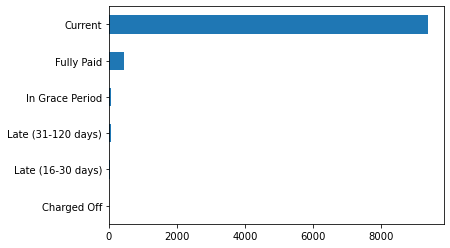

In [17]:
data.loan_status.value_counts().sort_values().plot(kind='barh')

In [18]:
#check initial listing status
data.initial_listing_status.unique()

array(['whole', 'fractional'], dtype=object)

In [19]:
#checking disbursement_method
data.disbursement_method.unique()

array(['Cash', 'DirectPay'], dtype=object)

In [20]:
#checking unique grade
data.grade.unique()

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

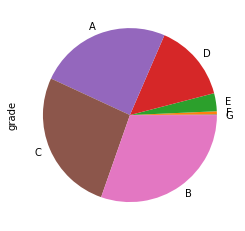

In [21]:
#checking the grade value 
data.grade.value_counts().sort_values().plot.pie()

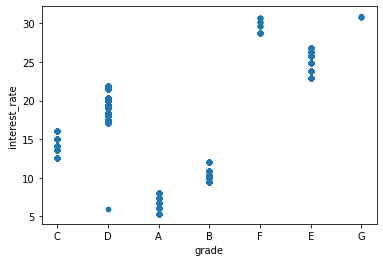

In [22]:
#Grade F have high interest rate and grade A have low interest rate
data.plot.scatter(x='grade', y='interest_rate')

In [23]:
#Checking unique subgrade
data.sub_grade.unique()

array(['C3', 'C1', 'D1', 'A3', 'C2', 'B5', 'C4', 'B2', 'B1', 'D3', 'F1',
       'E5', 'A2', 'A5', 'A4', 'A1', 'D4', 'D5', 'B3', 'D2', 'E1', 'G1',
       'B4', 'C5', 'E2', 'E4', 'F3', 'E3', 'F5', 'F2', 'F4', 'G4'],
      dtype=object)

In [24]:
#We will go with grade at first 
data.sub_grade.value_counts()

B1    647
B2    638
B5    631
C1    597
B4    581
C2    572
A4    568
B3    540
A3    504
C4    503
C3    501
A5    485
C5    480
A2    480
A1    422
D2    323
D1    319
D3    311
D5    262
D4    231
E5     91
E4     73
E3     73
E2     57
E1     41
F1     31
G1     11
F2      9
F3      9
F4      5
F5      4
G4      1
Name: sub_grade, dtype: int64

In [25]:
#create dummy variable of string column . One hot encoding will not give good result
data= pd.get_dummies(data,
                     columns = ['homeownership', 'verified_income','application_type','initial_listing_status','disbursement_method','grade','loan_purpose'])

In [26]:
#checking for null vlues
data.isna().sum()

emp_length                       817
state                              0
annual_income                      0
debt_to_income                    24
delinq_2y                          0
                                ... 
loan_purpose_moving                0
loan_purpose_other                 0
loan_purpose_renewable_energy      0
loan_purpose_small_business        0
loan_purpose_vacation              0
Length: 73, dtype: int64

In [27]:
#Checking mean and median
print(data['debt_to_income'].median(), data['debt_to_income'].mean())
print(data['emp_length'].median(), data['emp_length'].mean())
print(data['months_since_last_credit_inquiry'].median(), data['months_since_last_credit_inquiry'].mean())
print(data['num_accounts_120d_past_due'].median(),data['num_accounts_120d_past_due'].mean())
print(data['num_accounts_120d_past_due'].value_counts())

17.57 19.308191659983976
6.0 5.930306000217794
6.0 7.340703402451598
0.0 0.0
0.0    9682
Name: num_accounts_120d_past_due, dtype: int64


In [28]:
#fill with median
data = data.fillna(data.median())

In [29]:
#checking for null vlues
data.isna().sum()

emp_length                       0
state                            0
annual_income                    0
debt_to_income                   0
delinq_2y                        0
                                ..
loan_purpose_moving              0
loan_purpose_other               0
loan_purpose_renewable_energy    0
loan_purpose_small_business      0
loan_purpose_vacation            0
Length: 73, dtype: int64

In [30]:
#We can improve the imputation  by using MICE imputation

In [31]:
#check correlation between features and with interest rate
corr = data.corr()

In [32]:
#heat map of correltion between features
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\anura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\anura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


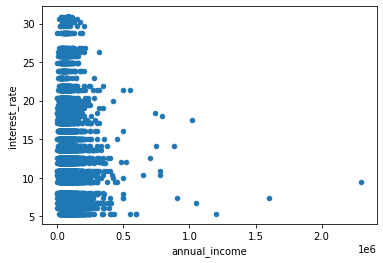

In [33]:
#We observe low annual income have high interest rate from the scatter graph
data.plot.scatter(x='annual_income', y='interest_rate')

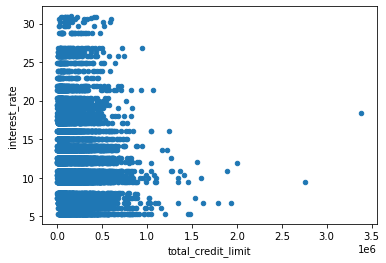

In [34]:
#We observe higher credit limit have lower interest rate.
data.plot.scatter(x='total_credit_limit', y='interest_rate')

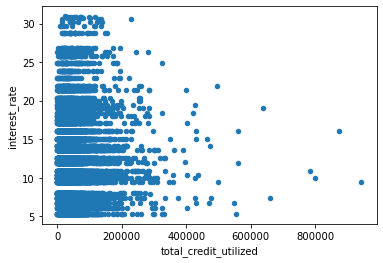

In [35]:
#Higher credit utilized dont have high interest rate
data.plot.scatter(x='total_credit_utilized', y='interest_rate')

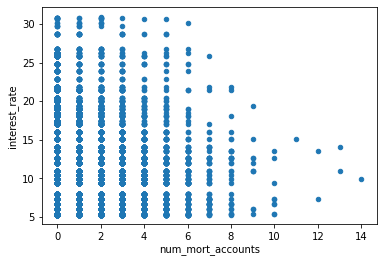

In [36]:
#Interest rate decreases with higher number of mort accounts
data.plot.scatter(x='num_mort_accounts', y='interest_rate')

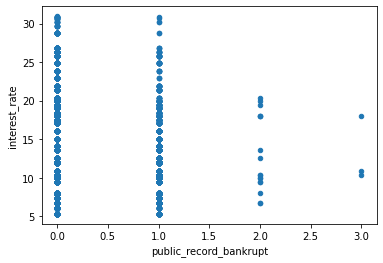

In [37]:
# It is seen that even with 0 Number of bankruptcies listed in the public record for  applicant have higher interest rate than 3 bankruptices
data.plot.scatter(x='public_record_bankrupt', y='interest_rate')

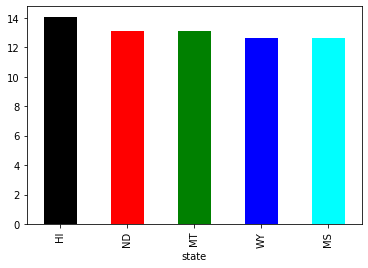

In [38]:
#Hi applicant have highest interest rate followed by north dakota
data.groupby("state").interest_rate.median().sort_values(ascending=False)[:5].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])

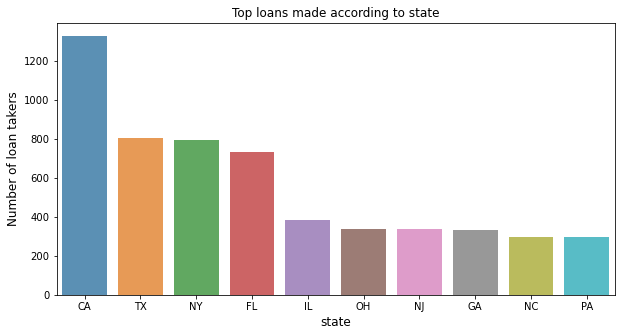

In [39]:
#Which state have more loaner
import matplotlib.pyplot as plt
import seaborn as sns
city_count  = data['state'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top loans made according to state')
plt.ylabel('Number of loan takers', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.show()

#### California have the highest number of loan takers followed by Texas

## 3. Modeling

In [40]:
#checking for features
for i in data:
    print(i)

emp_length
state
annual_income
debt_to_income
delinq_2y
earliest_credit_line
inquiries_last_12m
total_credit_lines
open_credit_lines
total_credit_limit
total_credit_utilized
num_collections_last_12m
num_historical_failed_to_pay
current_accounts_delinq
total_collection_amount_ever
current_installment_accounts
accounts_opened_24m
months_since_last_credit_inquiry
num_satisfactory_accounts
num_accounts_120d_past_due
num_accounts_30d_past_due
num_active_debit_accounts
total_debit_limit
num_total_cc_accounts
num_open_cc_accounts
num_cc_carrying_balance
num_mort_accounts
account_never_delinq_percent
tax_liens
public_record_bankrupt
loan_amount
term
interest_rate
installment
sub_grade
issue_month
loan_status
balance
paid_total
paid_principal
paid_interest
paid_late_fees
homeownership_MORTGAGE
homeownership_OWN
homeownership_RENT
verified_income_Not Verified
verified_income_Source Verified
verified_income_Verified
application_type_individual
application_type_joint
initial_listing_status_fractio

In [41]:
### Loan status , issue_month will not have impact the interest rate

In [45]:
#Features
X = data[['emp_length',
'annual_income',
'debt_to_income',
'delinq_2y',
'total_credit_lines',
'open_credit_lines',
'total_credit_limit',
'total_credit_utilized',
'num_collections_last_12m',
'num_mort_accounts',
'public_record_bankrupt',
'loan_amount',
'installment',
'balance',
'paid_total',
'paid_principal',
'paid_interest',
'paid_late_fees',
'homeownership_MORTGAGE',
'homeownership_OWN',
'homeownership_RENT',
'verified_income_Not Verified',
'verified_income_Source Verified',
'verified_income_Verified',
'application_type_individual',
'application_type_joint',
'initial_listing_status_fractional',
'initial_listing_status_whole',
'disbursement_method_Cash',
'disbursement_method_DirectPay',
'grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'loan_purpose_car',
'loan_purpose_credit_card',
'loan_purpose_debt_consolidation',
'loan_purpose_home_improvement',
'loan_purpose_house',
'loan_purpose_major_purchase',
'loan_purpose_medical',
'loan_purpose_moving',
'loan_purpose_other',
'loan_purpose_renewable_energy',
'loan_purpose_small_business',
'loan_purpose_vacation']]

In [61]:
#target variable
Y= data['interest_rate']

In [48]:
#pliting and shuffling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [53]:
#checking the size
len(X_train),len(X_test)

(7000, 3000)

### Random Forest

In [54]:
# Import the model 
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [56]:
# Use the forest's predict method on the test data
import numpy as np
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.6 degrees.


In [58]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.89 %.


### XGBoost

In [70]:
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[01:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.058782


In [72]:
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[01:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.214495


## To improve if I hve more time

### 1. We can use MICE for missing vlalues in the dataset.
### 2. After cleaning the dataset , we can use tools such as power bi and tableau for better visualizations.
### 3. We can use Neural Networks to check it improves performance.
### 4. We should use grid search to find the best hyperparameters for the model.
### 5. We can use PCA to cluster similar features and reduce features.
### 6. We can use other algorithms for the model.